# Investicating the force-elesticity effect of spring and rubber

assemble the aperatus as seen below
<img src="Screenshot2024-01-09154226.png" alt="image.png" width="50%">

And gradually increase the weight, measuring the distance at each, before decreasing the weight and measuring it again. Then repeat with elastic in place of the spring.


By plotting the 2 lines, up and down, we can compare the elasticity of rubber. The space in between the lines can be found using integration. in this case I will be using simpson.

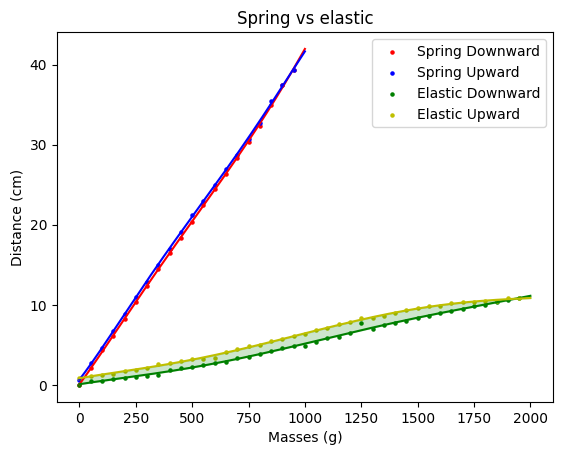

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#spring
starting_points = 55
wdspring = [55,57.1,59.3,61.1,63.2,65.3,67.4,69.5,71.5,73.4,75.4,77.5,79.5,81.4,83.4,85.4,87.3,90.0,92.5,94.3]
wuspring = [55.6,57.7,59.6,61.7,63.9,66.0,67.9,70.0,72.0,74.1,76.2,78.0,80.0,82.0,83.7,85.7,87.7,90.5,92.5,94.3]
wdspring = np.array(wdspring) - starting_points
wuspring = np.array(wuspring) - starting_points
masses = range(0,1000,50)

lin1 = np.poly1d(np.polyfit(masses, wdspring, 5))
lin2 = np.poly1d(np.polyfit(masses, wuspring, 5))
line = np.linspace(0,1000,1000)

#elastic
starting_pointe = 51.5
wdelastic = [51.5, 52.0, 52.0, 52.2, 52.4, 52.5, 52.6, 52.8, 53.4, 53.6, 53.8, 54.0, 54.2, 54.4, 54.8, 55.0, 55.3, 55.7, 56.1, 56.3, 56.3, 56.9, 57.3, 57.5, 58.0, 59.2, 58.5, 59.0, 59.2, 59.5, 59.9, 60.1, 60.5, 60.7, 61.0, 61.3, 61.5, 61.9, 62.1, 62.3]
wuelastic = [52.4, 52.6, 52.7, 52.9, 53.3, 53.4, 53.6, 54.1, 54.2, 54.5, 54.7, 54.7, 54.9, 55.6, 56.0, 56.3, 56.5, 57.0, 57.2, 57.6, 57.8, 58.3, 58.6, 59.1, 59.3, 59.8, 59.9, 60.1, 60.5, 60.9, 61.1, 61.3, 61.4, 61.7, 61.8, 61.9, 62.0, 62.0, 62.3, 62.3]
wdelastic = np.array(wdelastic) - starting_pointe
wuelastic = np.array(wuelastic) - starting_pointe
massese = range(0,2000,50)

line1 = np.poly1d(np.polyfit(massese, wdelastic, 5))
line2 = np.poly1d(np.polyfit(massese, wuelastic, 5))
linee = np.linspace(0,2000,2000)

#plotting
plt.plot(line, lin1(line), color='r')
plt.plot(line, lin2(line), color='b')
plt.plot(linee, line1(linee), color='g')
plt.plot(linee, line2(linee), color='y')
plt.scatter(masses, wdspring, color='r', label="Spring Downward", s=5)
plt.scatter(masses, wuspring, color='b', label="Spring Upward", s=5)
plt.scatter(massese, wdelastic, color='g', label="Elastic Downward", s=5)
plt.scatter(massese, wuelastic, color='y', label="Elastic Upward", s=5)
plt.fill_between(linee, line1(linee), line2(linee), color='g', alpha=0.2)
plt.xlabel("Masses (g)")
plt.ylabel("Distance (cm)")
plt.title("Spring vs elastic")
plt.legend()
plt.show()


In [38]:
import numpy as np
from scipy.integrate import simpson

#spring
starting_points = 55
wdspring = [55,57.1,59.3,61.1,63.2,65.3,67.4,69.5,71.5,73.4,75.4,77.5,79.5,81.4,83.4,85.4,87.3,90.0,92.5,94.3]
wuspring = [55.6,57.7,59.6,61.7,63.9,66.0,67.9,70.0,72.0,74.1,76.2,78.0,80.0,82.0,83.7,85.7,87.7,90.5,92.5,94.3]
wdspring = np.array(wdspring) - starting_points
wuspring = np.array(wuspring) - starting_points
masses = range(0,1000,50)

#elastic
starting_pointe = 51.5
wdelastic = [51.5, 52.0, 52.0, 52.2, 52.4, 52.5, 52.6, 52.8, 53.4, 53.6, 53.8, 54.0, 54.2, 54.4, 54.8, 55.0, 55.3, 55.7, 56.1, 56.3, 56.3, 56.9, 57.3, 57.5, 58.0, 59.2, 58.5, 59.0, 59.2, 59.5, 59.9, 60.1, 60.5, 60.7, 61.0, 61.3, 61.5, 61.9, 62.1, 62.3]
wuelastic = [52.4, 52.6, 52.7, 52.9, 53.3, 53.4, 53.6, 54.1, 54.2, 54.5, 54.7, 54.7, 54.9, 55.6, 56.0, 56.3, 56.5, 57.0, 57.2, 57.6, 57.8, 58.3, 58.6, 59.1, 59.3, 59.8, 59.9, 60.1, 60.5, 60.9, 61.1, 61.3, 61.4, 61.7, 61.8, 61.9, 62.0, 62.0, 62.3, 62.3]
wdelastic = np.array(wdelastic) - starting_pointe
wuelastic = np.array(wuelastic) - starting_pointe
massese = range(0,2000,50)

#integrating
springdown = simpson(wdspring, masses)
springup = simpson(wuspring, masses)
elasticdown = simpson(wdelastic, massese)
elasticup = simpson(wuelastic, massese)

#print
print("Sping up-down: " + str(springup-springdown))
print("Elastic up-down: " + str(elasticup-elasticdown))

Sping up-down: 474.58333333332484
Elastic up-down: 1927.916666666666


The difference in integrations, shows the gap between the lines, showing that the elastic suffered far more, losing its poportionality, between the way down, and back up.